<a href="https://colab.research.google.com/github/DataRobot333/ScrapDataAnalystSite/blob/main/DataAnalystDataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# preprocessing


In [1]:
import pandas as pd

# loading data

lets load our data from github

In [5]:
github_csv_url = 'https://raw.githubusercontent.com/DataRobot333/ScrapDataAnalystSite/main/job_listings.csv'

# Load the data into a pandas DataFrame
try:
    df = pd.read_csv(github_csv_url)
    print(f"Data loaded successfully from {github_csv_url}")
    display(df.head(2))
except Exception as e:
    print(f"An error occurred while loading data: {e}")
    print("Please ensure the URL is correct and the file is accessible. Double-check that it's the 'raw' URL from GitHub.")


Data loaded successfully from https://raw.githubusercontent.com/DataRobot333/ScrapDataAnalystSite/main/job_listings.csv


,Job Title,Company,Location,Country,Workplace,Experience,Industry,Salary,Published Date
0,Data Analyst,Thomson Reuters,"San Diego, CA",United States,In-office,0 - 3 years,Tech,"$72,100 - $133,900","Nov 3, 2025"
1,"Data Analyst, Insights and Reporting",Sony Music Entertainment,"New York, NY",United States,In-office,0 - 3 years,Entertainment,"$64,000 - $70,000","Aug 27, 2025"


for most of job titles there is 2 part. first the job title and the field they are categurized. so let split them for further analysis.

In [6]:
df[['Job Title', 'Field']] = df['Job Title'].str.split(',', n=1, expand=True)
df.head(1)

,Job Title,Company,Location,Country,Workplace,Experience,Industry,Salary,Published Date,Field
0,Data Analyst,Thomson Reuters,"San Diego, CA",United States,In-office,0 - 3 years,Tech,"$72,100 - $133,900","Nov 3, 2025",None


there is only United state so must drop it from our dataset

In [7]:
df = df.drop('Country', axis= 1, inplace= False)

In [8]:
df[['Location','State']]= df['Location'].str.split(',', n=1, expand=True)
df.head(1)

,Job Title,Company,Location,Workplace,Experience,Industry,Salary,Published Date,Field,State
0,Data Analyst,Thomson Reuters,San Diego,In-office,0 - 3 years,Tech,"$72,100 - $133,900","Nov 3, 2025",None,CA


we might want to drop the original 'Salary' column if you no longer need it, to avoid redundancy in your DataFrame.

its look like that Salary is stored as Str

In [9]:
type(df['Salary'].values[0])

str

In [10]:
# Split the 'Salary' column by '-' to get two parts
salary_parts = df['Salary'].str.split(' - ', expand=True)

# Clean and convert 'start_salary'
df['min_salary'] = salary_parts[0].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(int)

# Clean and convert 'end_salary'
df['max_salary'] = salary_parts[1].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(int)



In [11]:
df.head(100)

,Job Title,Company,Location,Workplace,Experience,Industry,Salary,Published Date,Field,State,min_salary,max_salary
0,Data Analyst,Thomson Reuters,San Diego,In-office,0 - 3 years,Tech,"$72,100 - $133,900","Nov 3, 2025",None,CA,72100,133900
1,Data Analyst,Sony Music Entertainment,New York,In-office,0 - 3 years,Entertainment,"$64,000 - $70,000","Aug 27, 2025",Insights and Reporting,NY,64000,70000
2,Senior Data Analyst,Nintendo,Redmond,Hybrid,5 - 10 years,Tech,"$105,300 - $168,500","Aug 27, 2025",Insights and Analytics,WA,105300,168500
3,Lead Data Analyst,SeatGeek,New York,In-office,5 - 10 years,Tech,"$125,000 - $180,000","Aug 27, 2025",None,NY,125000,180000
4,Data Analyst,Rent The Runway,Brooklyn,In-office,3 - 5 years,Retail,"$100,000 - $125,000","Aug 27, 2025",None,NY,100000,125000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Senior Data Analyst,Starr Insurance,New York,Hybrid,3 - 5 years,Insurance,"$130,000 - $150,000","Apr 5, 2025",None,NY,130000,150000
96,Senior Data Analyst,Thrive Causemetics,Los Angeles,Hybrid,0 - 3 years,Retail,"$100,000 - $115,000","Apr 5, 2025",None,CA,100000,115000
97,Data Analyst,Children's Institute,Los Angeles,In-office,3 - 5 years,Healthcare,"$73,601 - $85,469","Apr 3, 2025",None,CA,73601,85469
98,Senior Forecast Analyst,Amazon,Nashville,In-office,5 - 10 years,Tech,"$103,900 - $181,400","Apr 3, 2025",None,TN,103900,181400


In [12]:
df.drop('Salary', axis = 1, inplace = True)
df.head(1)

,Job Title,Company,Location,Workplace,Experience,Industry,Published Date,Field,State,min_salary,max_salary
0,Data Analyst,Thomson Reuters,San Diego,In-office,0 - 3 years,Tech,"Nov 3, 2025",None,CA,72100,133900


In [13]:
df['Experience'].value_counts()

,count
Experience,
3 - 5 years,197
5 - 10 years,127
0 - 3 years,94


In [14]:
df['Experience'] = df['Experience'].str.replace(' years', '', regex=False)

In [15]:
len(df[
    'Published Date'
].unique())

219

In [16]:
df.columns

Index(['Job Title', 'Company', 'Location', 'Workplace', 'Experience',
       'Industry', 'Published Date', 'Field', 'State', 'min_salary',
       'max_salary'],
      dtype='object')

lets consider the average of salaries for smoother analysis


In [17]:
df['average_salary'] = (df['min_salary'] + df['max_salary'])/2
df.head(1)

,Job Title,Company,Location,Workplace,Experience,Industry,Published Date,Field,State,min_salary,max_salary,average_salary
0,Data Analyst,Thomson Reuters,San Diego,In-office,0 - 3,Tech,"Nov 3, 2025",None,CA,72100,133900,103000.0


In [18]:
# Convert 'Published Date' column to datetime objects
df['Published Date'] = pd.to_datetime(df['Published Date'])
df.head(1)

,Job Title,Company,Location,Workplace,Experience,Industry,Published Date,Field,State,min_salary,max_salary,average_salary
0,Data Analyst,Thomson Reuters,San Diego,In-office,0 - 3,Tech,2025-11-03,None,CA,72100,133900,103000.0


In [19]:
# Get the current column names
current_columns = df.columns.tolist()

# Define your desired new order.
# You can rearrange, remove, or add columns as needed here.
# For example, let's move 'job title' and 'field' to the front.
new_column_order = [
    'Job Title',
    'Field',
    'Company',
    'Industry',
    'Location',
    'State',
    'Workplace',
    'Experience',
    'min_salary',
    'max_salary',
    'average_salary',
    'Published Date'
]

# Reindex the DataFrame with the new column order
df = df[new_column_order]

# Display the first few rows to verify the new order
display(df.head(1))

,Job Title,Field,Company,Industry,Location,State,Workplace,Experience,min_salary,max_salary,average_salary,Published Date
0,Data Analyst,None,Thomson Reuters,Tech,San Diego,CA,In-office,0 - 3,72100,133900,103000.0,2025-11-03


# Analysis


In [ ]:
df.columns

Index(['Job Title', 'Field', 'Company', 'Industry', 'Location', 'State',
       'Workplace', 'Experience', 'min_salary', 'max_salary', 'average_salary',
       'Published Date'],
      dtype='object')

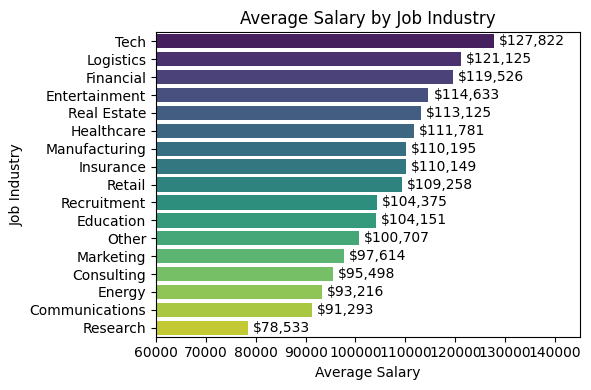

In [ ]:
# Calculate the average salary for each field
average_salary_by_field = df.groupby('Industry')['average_salary'].mean().reset_index()

# Sort the fields by average salary for better visualization
average_salary_by_field_sorted = average_salary_by_field.sort_values(by='average_salary', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.barplot(x='average_salary', y='Industry', data=average_salary_by_field_sorted, palette='viridis', hue='Industry', legend=False)
plt.title('Average Salary by Job Industry')
plt.xlabel('Average Salary')
plt.ylabel('Job Industry')

# Set x-axis limits
plt.xlim(60000, 145000)

# Add the count on top of each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1000, p.get_y() + p.get_height()/2, f'${int(width):,}', va='center')

plt.tight_layout()
plt.show()

In [ ]:
df[df['Industry'] == 'Tech']['Field'].value_counts()[:10]

,count
Field,
Product,5
Staff,4
Marketing,4
Product Growth,4
Client Services,2
Mission Control Analytics,2
Operations,2
Media Strategy,1
Talent Analytics,1


In [ ]:
tech_industry_fields = df[df['Industry'] == 'Tech']['Field'].unique()
print("Fields within the Tech Industry:")
for field in tech_industry_fields:
    print(f"- {field}")

Fields within the Tech Industry:
- None
-  Insights and Analytics
-  Talent Analytics
-  GTM Analytics
-  Growth Marketing Insights
-  Media Strategy
-  Mission Control Analytics
-  Finance
-  Product Growth
-  Consumer Product
-  Retail Operations
-  Fraud Research
-  Client Services
-  Communiations
-  Operations
-  Revenue Assurance
-  Product
-  Risk Insights
-  Supply Chain
-  Amazon MODE
-  Analytics &  Insights
-  Marketing
-  Audience Impact & Intelligence
-  Customer Analytics
-  People
-  Staff
-  Lever Insights
-  Quality
-  Compliance
-  Technical Support
-  Trust & Safety
-  BI
-  Healthcare
-  Risk
-  Growth Strategy
-  EDI
-  Sales
-  Operations Research


Average Salary for each Field in the Tech Industry:


,Field,average_salary
12,GTM Analytics,183300.0
34,Talent Analytics,180000.0
30,Risk Insights,171000.0
1,Analytics & Insights,161250.0
28,Revenue Assurance,157500.0
10,Finance,155750.0
24,Product,155600.0
14,Growth Strategy,150750.0
5,Communiations,150000.0
20,Mission Control Analytics,150000.0


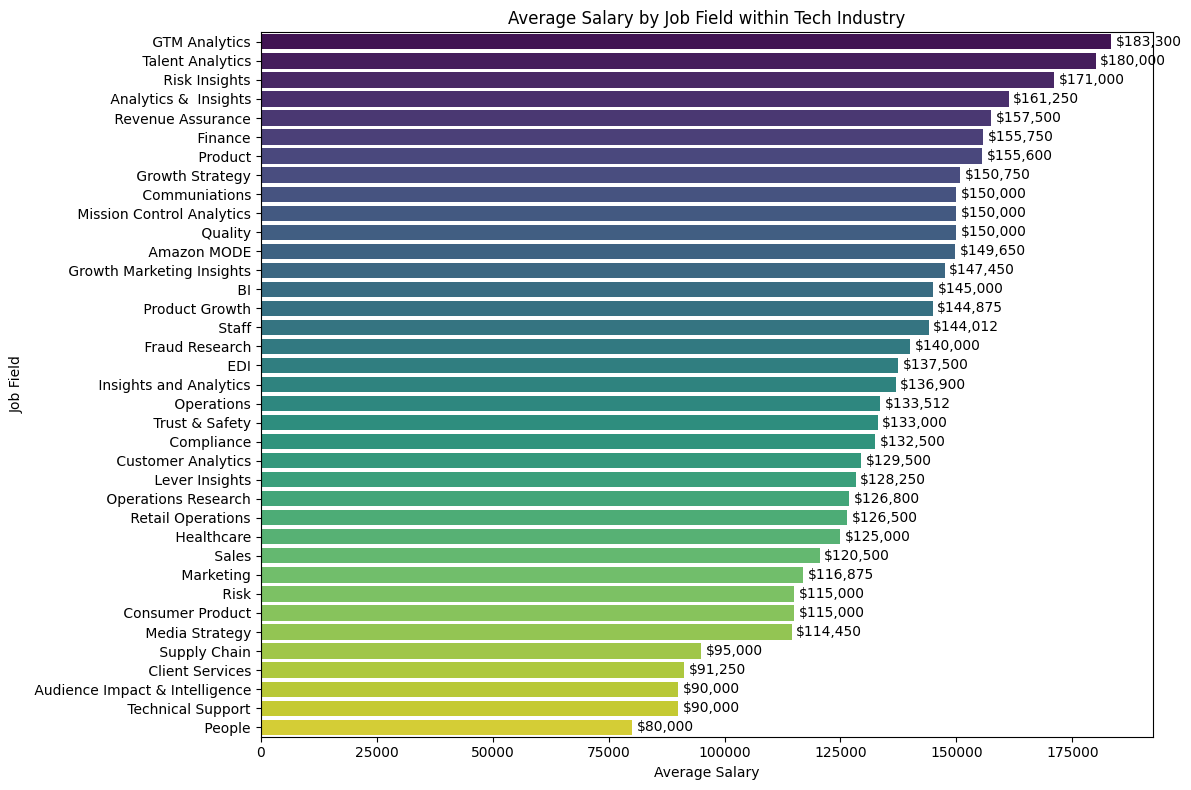

In [ ]:
# Filter the DataFrame for jobs in the 'Tech' industry
tech_jobs_df = df[df['Industry'] == 'Tech']

# Calculate the average salary for each 'Field' within the 'Tech' industry
average_salary_tech_field = tech_jobs_df.groupby('Field')['average_salary'].mean().reset_index()

# Sort the fields by average salary for better visualization
average_salary_tech_field_sorted = average_salary_tech_field.sort_values(by='average_salary', ascending=False)

print("Average Salary for each Field in the Tech Industry:")
display(average_salary_tech_field_sorted.head(10))

# Create a bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='average_salary', y='Field', data=average_salary_tech_field_sorted, palette='viridis', hue='Field', legend=False)
plt.title('Average Salary by Job Field within Tech Industry')
plt.xlabel('Average Salary')
plt.ylabel('Job Field')

# Add the count on top of each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1000, p.get_y() + p.get_height()/2, f'${int(width):,}', va='center')

plt.tight_layout()
plt.show()

In [ ]:
df[df['Industry'] == 'Tech']

,Job Title,Field,Company,Industry,Location,State,Workplace,Experience,min_salary,max_salary,average_salary,Published Date
0,Data Analyst,None,Thomson Reuters,Tech,San Diego,CA,In-office,0 - 3,72100,133900,103000.0,2025-11-03
2,Senior Data Analyst,Insights and Analytics,Nintendo,Tech,Redmond,WA,Hybrid,5 - 10,105300,168500,136900.0,2025-08-27
3,Lead Data Analyst,None,SeatGeek,Tech,New York,NY,In-office,5 - 10,125000,180000,152500.0,2025-08-27
6,Data Analyst,Talent Analytics,Netflix,Tech,Remote,None,Remote,0 - 3,80000,280000,180000.0,2025-08-08
7,Staff Data Analyst,GTM Analytics,Snowflake,Tech,Menlo Park,CA,Hybrid,5 - 10,153000,213600,183300.0,2025-08-06
...,...,...,...,...,...,...,...,...,...,...,...,...
384,Data Analyst,Operations,Roblox,Tech,San Mateo,CA,Hybrid,5 - 10,159870,184180,172025.0,2024-03-08
400,Senior Data Analyst,None,Tucows,Tech,Remote,None,Remote,5 - 10,99900,111000,105450.0,2023-12-07
404,Senior Data Analyst,None,Leaf Trade,Tech,Remote,None,Remote,3 - 5,90000,100000,95000.0,2023-11-27
412,Data Analyst,Staff,Bill,Tech,San Jose,CA,Hybrid,5 - 10,126900,151800,139350.0,2023-10-06


In [ ]:
len(df[df['Industry'] == 'Tech'])

108

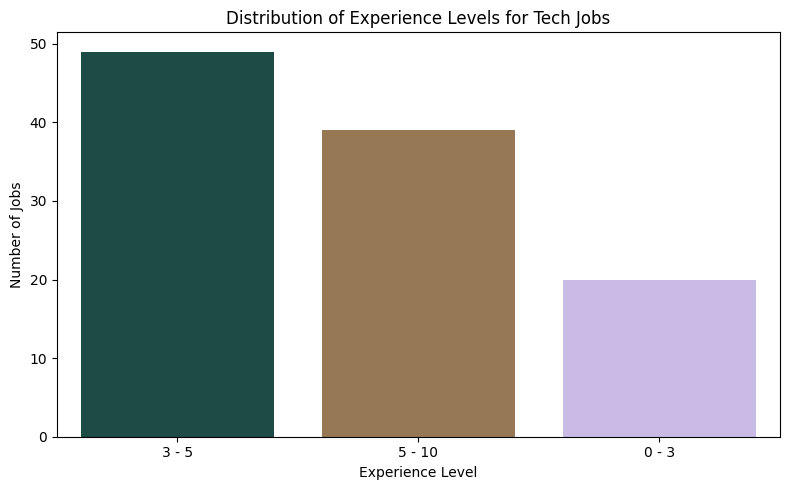

In [ ]:
# Filter the DataFrame for jobs in the 'Tech' industry (already done, using tech_jobs_df)
# tech_jobs_df = df[df['Industry'] == 'Tech']

# Get the value counts for 'Experience' in tech jobs
experience_distribution_tech = tech_jobs_df['Experience'].value_counts().reset_index()
experience_distribution_tech.columns = ['Experience', 'Count']

# Create a bar plot to visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Experience', y='Count', data=experience_distribution_tech, palette='cubehelix', hue='Experience', legend=False)
plt.title('Distribution of Experience Levels for Tech Jobs')
plt.xlabel('Experience Level')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.show()

In [ ]:
df.columns.tolist()

['Job Title',
 'Field',
 'Company',
 'Industry',
 'Location',
 'State',
 'Workplace',
 'Experience',
 'min_salary',
 'max_salary',
 'Published Date']

/tmp/ipython-input-2087660338.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Published_Month_Year', y='Number of Jobs', data=jobs_per_month, palette='viridis')


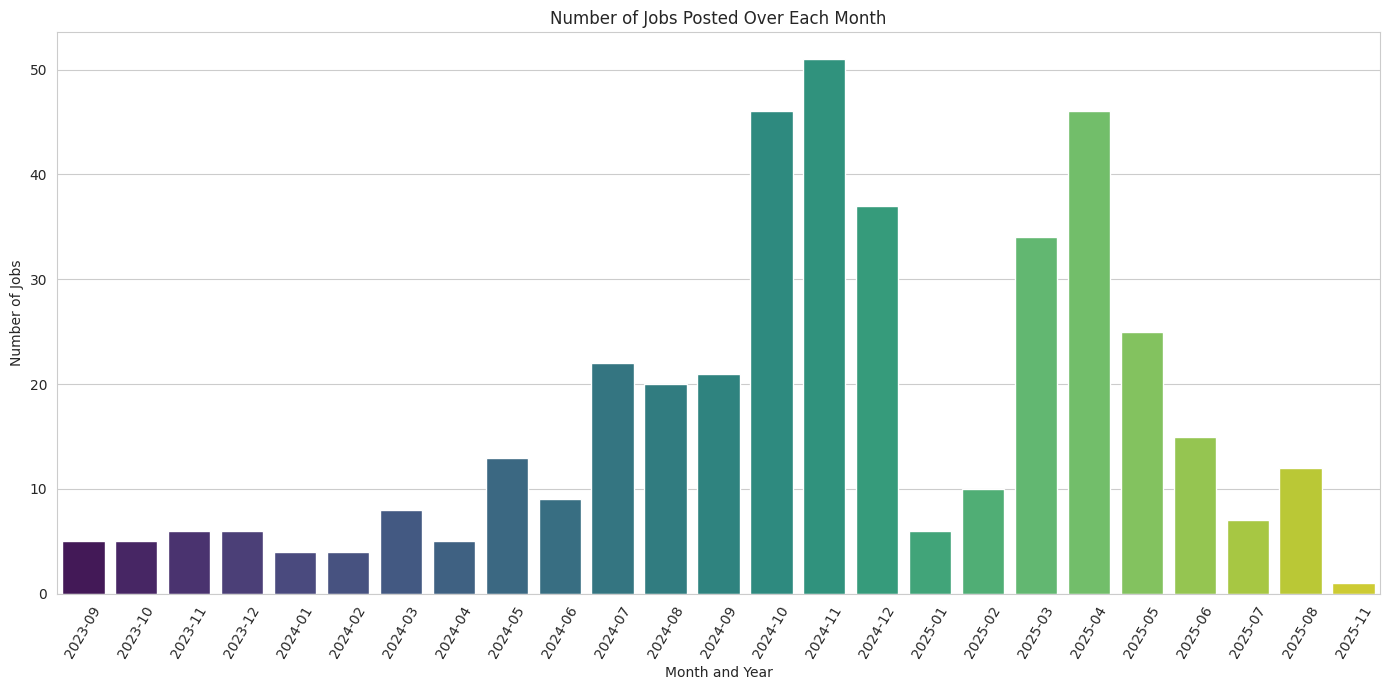

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract month and year for grouping
df['Published_Month_Year'] = df['Published Date'].dt.to_period('M')

# Group by month and count the number of jobs
jobs_per_month = df.groupby('Published_Month_Year').size().reset_index(name='Number of Jobs')

# Convert 'Published_Month_Year' back to string for better plotting labels
jobs_per_month['Published_Month_Year'] = jobs_per_month['Published_Month_Year'].astype(str)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='Published_Month_Year', y='Number of Jobs', data=jobs_per_month, palette='viridis')
plt.title('Number of Jobs Posted Over Each Month')
plt.xlabel('Month and Year')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=60) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

/tmp/ipython-input-2056696212.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Count', data=location_counts.head(20), palette='viridis')


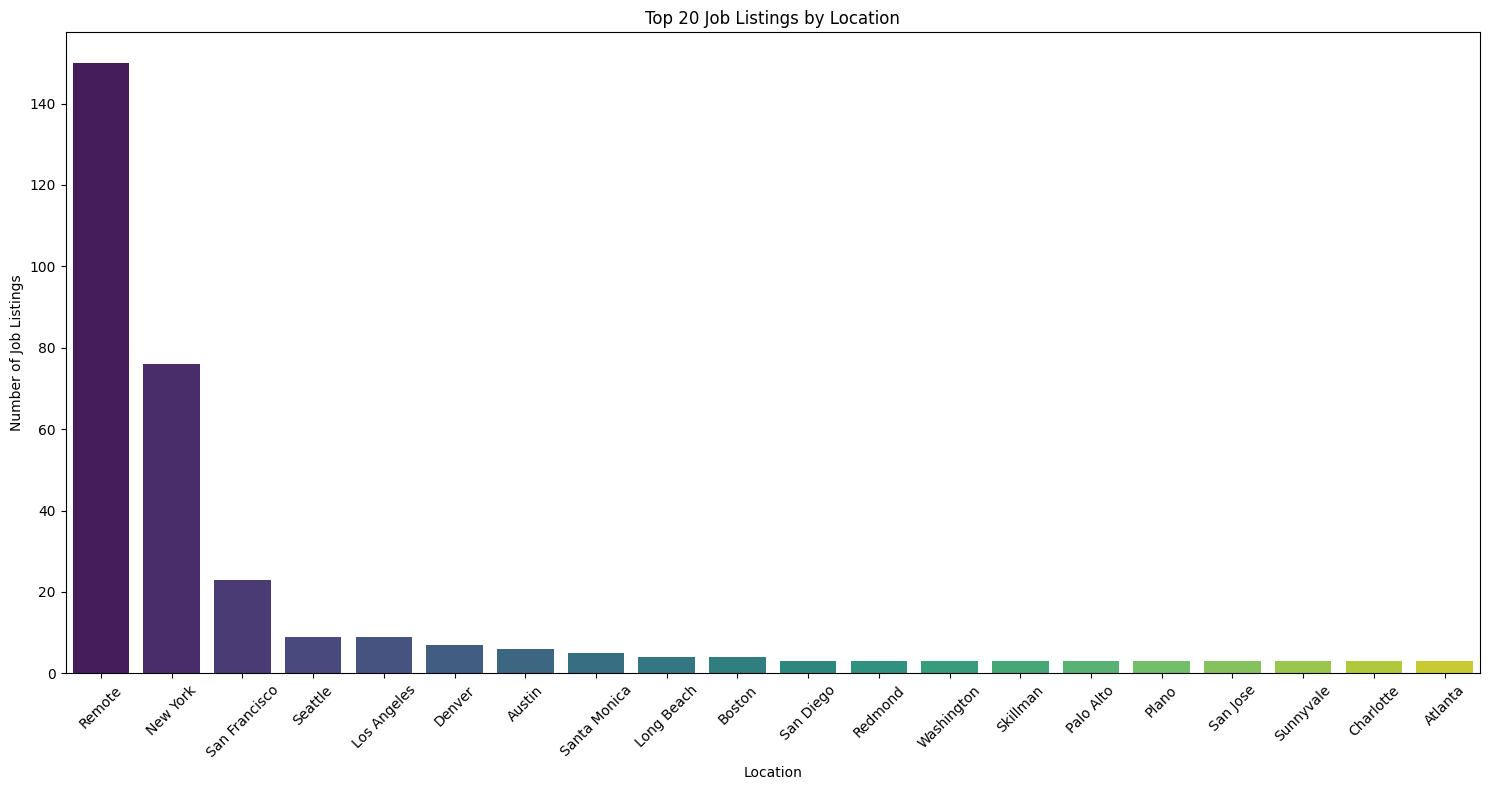

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts of the 'Location' column
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Count']

# Create a bar plot to visualize the location distribution
plt.figure(figsize=(15, 8))
sns.barplot(x='Location', y='Count', data=location_counts.head(20), palette='viridis')
plt.title('Top 20 Job Listings by Location')
plt.xlabel('Location')
plt.ylabel('Number of Job Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
jobs_per_state = df.groupby('State').size().reset_index()
jobs_per_state.rename(columns={'State': 'State'}, inplace=True)
jobs_per_state.head()

,State,0
0,AL,1
1,AR,1
2,AZ,1
3,CA,76
4,CO,14


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.barplot(x='State', y='Job Count', data=jobs_per_state, palette='viridis')
plt.title('Job Count by State')
plt.xlabel('State')
plt.ylabel('Number of Job Listings')
plt.xticks(rotation=30) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Job Count` for `y`. An entry with this name does not appear in `data`.

<Figure size 1500x700 with 0 Axes>

In [ ]:
jobs_per_state

,State,0
0,AL,1
1,AR,1
2,AZ,1
3,CA,76
4,CO,14
5,CT,3
6,D.C.,3
7,DE,1
8,FL,2
9,GA,4


<Axes: xlabel='State', ylabel='Job Count'>

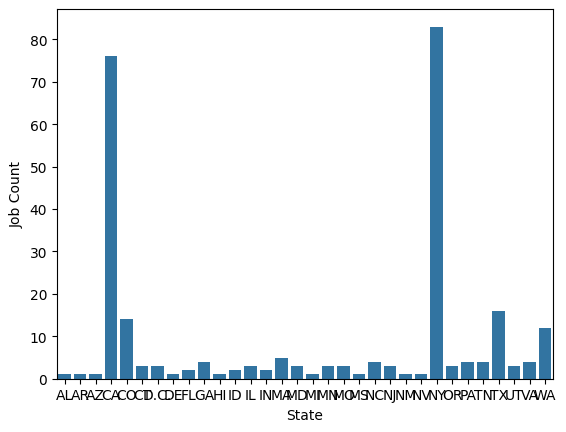

In [ ]:
sns.barplot(x= jobs_per_state['State'], y = jobs_per_state['Job Count'])

In [ ]:
jobs_per_state_sorted = jobs_per_state.sort_values(by='Job Count', ascending=False).reset_index(drop=True)
display(jobs_per_state_sorted.head())

,State,Job Count
0,NY,83
1,CA,76
2,TX,16
3,CO,14
4,WA,12


/tmp/ipython-input-2160046248.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




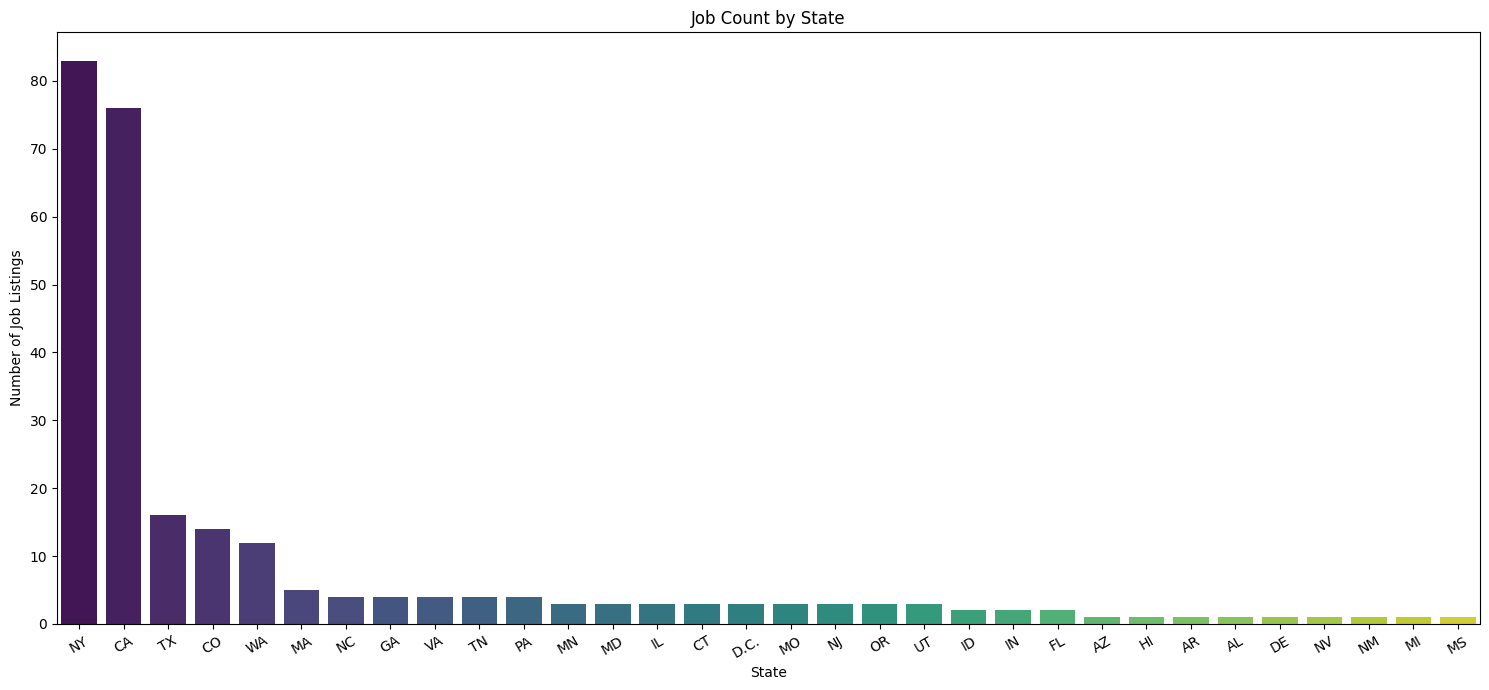

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.barplot(x='State', y='Job Count', data=jobs_per_state_sorted, palette='viridis')
plt.title('Job Count by State')
plt.xlabel('State')
plt.ylabel('Number of Job Listings')
plt.xticks(rotation=30) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
jobs_per_state.head()

,State,Job Count
0,AL,1
1,AR,1
2,AZ,1
3,CA,76
4,CO,14


In [ ]:
df.columns

Index(['Job Title', 'Field', 'Company', 'Industry', 'Location', 'State',
       'Workplace', 'Experience', 'min_salary', 'max_salary', 'Published Date',
       'average_salary', 'experience_midpoint'],
      dtype='object')

In [ ]:
df['Job Title'].value_counts()

,count
Job Title,
Data Analyst,212
Senior Data Analyst,151
Lead Data Analyst,7
Staff Data Analyst,5
i-team Data Analytics Manager,3
Workforce Analyst,2
Business Intelligence Analyst,2
Product Analyst,2
Junior Data Analyst,2


In [ ]:
df.columns

Index(['Job Title', 'Field', 'Company', 'Industry', 'Location', 'State',
       'Workplace', 'Experience', 'min_salary', 'max_salary', 'Published Date',
       'average_salary', 'experience_midpoint'],
      dtype='object')

In [ ]:
df['experience_midpoint'].value_counts()

,count
experience_midpoint,
4.0,197
7.5,127
1.5,94


In [ ]:
df['Experience'].value_counts()

,count
Experience,
3 - 5,197
5 - 10,127
0 - 3,94


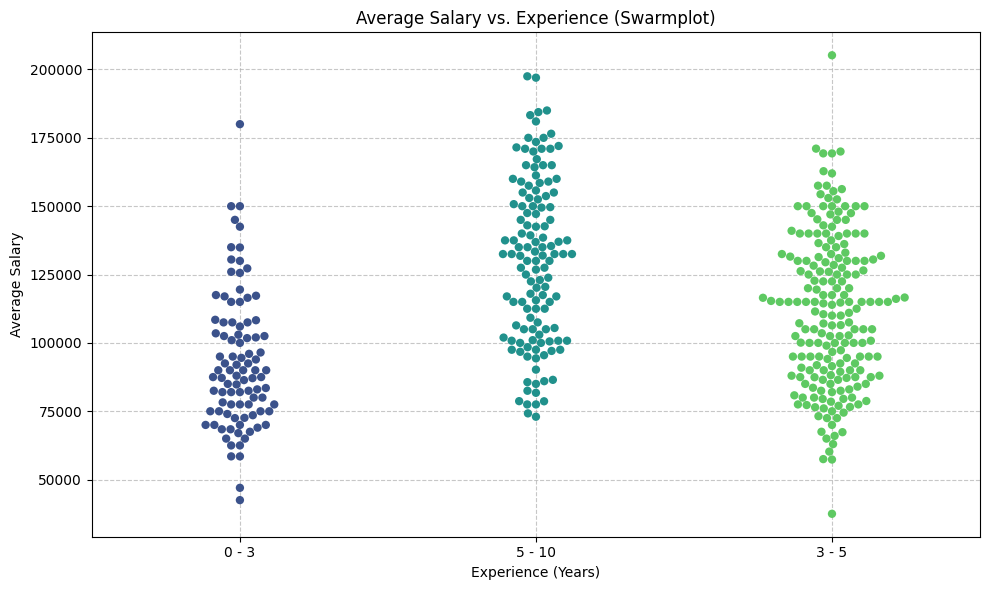

In [ ]:
# Calculate the average salary for each job listing
df['average_salary'] = (df['min_salary'] + df['max_salary']) / 2

# The 'Experience' column is already categorical, suitable for violinplot

# Create the violin plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='Experience', y='average_salary', data=df, hue='Experience', palette='viridis', inner='quartile')
plt.title('Average Salary vs. Experience (Violinplot)')
plt.xlabel('Experience (Years)')
plt.ylabel('Average Salary')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

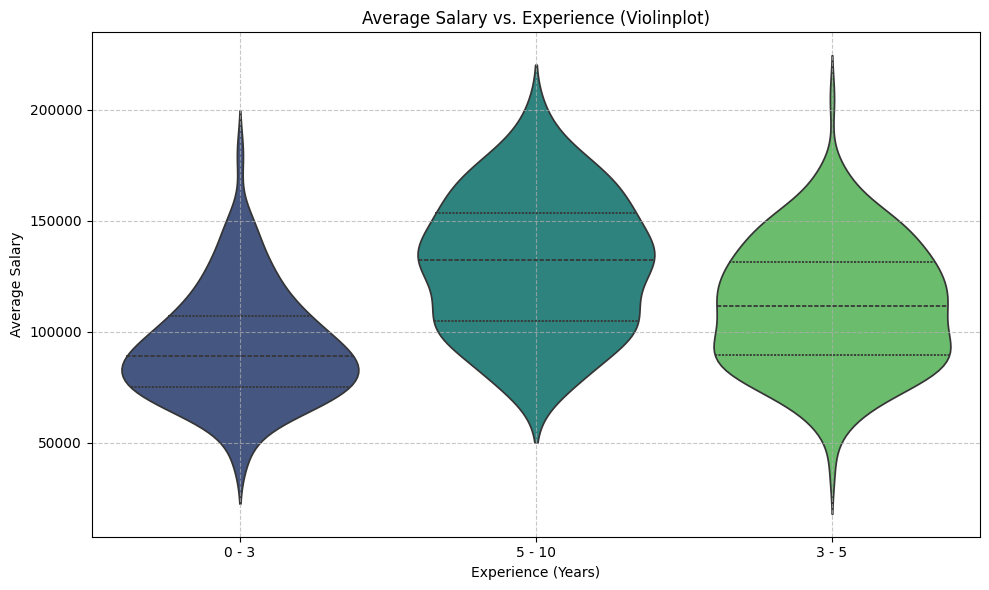

In [ ]:
# Calculate the average salary for each job listing
df['average_salary'] = (df['min_salary'] + df['max_salary']) / 2

# The 'Experience' column is already categorical, suitable for violinplot

# Create the violin plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='Experience', y='average_salary', data=df, hue='Experience', palette='viridis', inner='quartile')
plt.title('Average Salary vs. Experience (Violinplot)')
plt.xlabel('Experience (Years)')
plt.ylabel('Average Salary')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Task
To save the preprocessed `df` DataFrame to a CSV file named `job_listing_preprocessed.csv` and then provide instructions on how to upload this file to GitHub.

## Save DataFrame to CSV

### Subtask:
Save the preprocessed `df` DataFrame to a CSV file named `job_listing_preprocessed.csv` in the current working directory.


**Reasoning**:
To save the preprocessed DataFrame to a CSV file, I will use the `to_csv()` method on the `df` DataFrame, specifying the desired filename and setting `index=False`.



In [20]:
df.to_csv('job_listing_preprocessed.csv', index=False)
print("DataFrame saved to 'job_listing_preprocessed.csv'")

DataFrame saved to 'job_listing_preprocessed.csv'


## Submitting Notebook Changes to GitHub (using Git)

Since you've renamed your notebook and made other changes, the most robust way to update your GitHub repository is by using Git commands from your local machine.

### Prerequisites:
*   **Git Installed:** Ensure you have Git installed on your computer.
*   **Local Repository:** You should have a local copy of your GitHub repository cloned to your machine. If not, you'll need to clone it first:
    ```bash
    git clone <your_repository_url>
    ```
    (Replace `<your_repository_url>` with the URL of your GitHub repository.)

### Steps to Submit Changes:

1.  **Navigate to your Repository:**
    Open your terminal or command prompt and navigate to the root directory of your local GitHub repository.
    ```bash
    cd /path/to/your/local/repository
    ```

2.  **Check Status (Optional but Recommended):**
    See which files have been changed, added, or renamed.
    ```bash
    git status
    ```
    You should see `DataAnalystDataProcessing.ipynb` listed as a renamed file, and `job_listing_preprocessed.csv` as a new or modified file.

3.  **Stage Your Changes:**
    Add all modified files (including the renamed notebook and the new CSV) to the staging area. The `-A` flag stages all changes.
    ```bash
    git add -A
    ```
    Alternatively, you can add specific files:
    ```bash
    git add DataAnalystDataProcessing.ipynb
    git add job_listing_preprocessed.csv
    ```

4.  **Commit Your Changes:**
    Record the staged changes to your local repository with a descriptive commit message.
    ```bash
    git commit -m "Rename notebook to DataAnalystDataProcessing.ipynb and add preprocessed CSV"
    ```

5.  **Push Changes to GitHub:**
    Upload your local commits to your remote GitHub repository.
    ```bash
    git push origin main
    ```
    (Replace `main` with `master` if your default branch is named `master`).

After these steps, your GitHub repository will be updated with the new notebook name and the `job_listing_preprocessed.csv` file.

# Task
Provide step-by-step instructions on how to upload the `job_listing_preprocessed.csv` file to your GitHub repository. This will involve navigating to your repository on GitHub, creating a new file or uploading an existing one, and committing the changes.

## Final Task

### Subtask:
Provide step-by-step instructions on how to upload the `job_listing_preprocessed.csv` file to your GitHub repository. This will involve navigating to your repository on GitHub, creating a new file or uploading an existing one, and committing the changes.


## Summary:

### Data Analysis Key Findings
The process outlines the following steps to upload the `job_listing_preprocessed.csv` file to a GitHub repository:

*   **Navigate to your GitHub repository**: Open your web browser and go to your GitHub account. Select the specific repository where you want to upload the file.
*   **Access the file upload interface**: Once in the repository, click on the "Add file" dropdown menu, then select "Upload files".
*   **Upload the file**: Drag and drop the `job_listing_preprocessed.csv` file into the designated area, or click "choose your files" to browse and select it from your local system.
*   **Commit the changes**: Provide a clear and concise commit message (e.g., "Add job_listing_preprocessed.csv") in the commit message box. Optionally, add a more detailed description. Finally, click the "Commit changes" button to finalize the upload.

### Insights or Next Steps
*   This method is suitable for small file uploads and quick updates directly via the GitHub web interface.
*   For larger files or more complex version control workflows, consider using Git command-line tools to clone the repository, add the file, commit, and push changes.
